# RQ 1.2

## Prerequisites: evaluation data
as part of the setup, we assume the stargan-v2 data is available under the following path:
- `src/cycle-diffusion/stargan-v2/data/test`

## Pipeline to create the neccessary data for the experiment
The whole pipeline can be run on LISA using this `.job` script:

    `run_experiment_1_2.job`

We will explain the sub-steps of the pipeline in the next sections.

###  Prepare the data
- Prepare modifications of the original cat images and store them. 
- Modifications include horizontal flip, rotation of 0, 1, 5, 10, 30, 45, and 90 degrees.
    - The rotation of 0 degrees is the original image, testing whether applying the encoding process results in the same latent vector $z$.

In [1]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from skimage.io import imread
from PIL import Image
import os, os.path
from pathlib import Path
import pickle
from numpy.linalg import norm

In [2]:
# SETTINGS
BASE_DIR = Path('../src/cycle-diffusion')
EXPERIMENT_DIR = BASE_DIR / 'exp1_2_data'
RESET = False # set to True if you want to prepare the data

In [3]:
# Helper Functions

def load_data(path):
    imgs = []
    valid_images = [".jpg",".gif",".png",".tga"]
    # for f in os.listdir(path):
    for f in path.iterdir():
        ext = f.suffix
        
        if ext not in valid_images:
            print(f"Skipping {f} because it is not a valid image")
            continue
        imgs.append(Image.open(os.path.join(path,f)))
        print(f"Loaded {f}")

    return imgs

def horizontal_flip(img):
    path, name  = Path(img.filename).parents[0], Path(img.filename).stem
    new_name = f'{name}rotated0flipped.png'
    
    img2 = img.transpose(Image.FLIP_LEFT_RIGHT)
    img2.save(path / new_name)
    
def rotate_and_save(img, angle):
    path, name  = Path(img.filename).parents[0], Path(img.filename).stem
    new_name = f'{name}rotated{str(angle)}.png'
    
    padded = np.pad(img, pad_width=((128, 128), (128, 128), (0, 0)), mode='symmetric')
    padded = Image.fromarray(padded)
    
    img2 = padded.rotate(angle)
    
    width, height = img2.size
    new_width, new_height = 512, 512
    
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2
    
    img2 = img2.crop((left, top, right, bottom)) # standard resize because images are 512x512

    img2.save(path / new_name)

def save_image_perturbations(imgs, angles=[0, 1, 5, 10, 30, 45, 90]):
    """
    Best variant using padding, other variants see below.
    """
    
    for img in imgs:
        # horizontal flip, and saving 
        horizontal_flip(img) 
            
        # rotations
        for angle in angles:
            rotate_and_save(img, angle)
            

In [4]:
cat_path = EXPERIMENT_DIR / 'cat'
dog_path = EXPERIMENT_DIR / 'dog'
wild_path = EXPERIMENT_DIR / 'wild'

if RESET:
    cat_dataset = load_data(cat_path) 
    dog_dataset = load_data(dog_path)
    wild_dataset = load_data(wild_path) 

    print(f'Dataset Lengths: {len(cat_dataset)}, {len(dog_dataset)}, {len(wild_dataset)}')
    
    datasets = [cat_dataset, dog_dataset, wild_dataset]
    angles = [0, 1, 5, 10, 30, 45, 90] # 0 is the duplicate of the original

    # ONLY RUN THIS ONCE
    for dataset in datasets:
        save_image_perturbations(dataset, angles=angles)

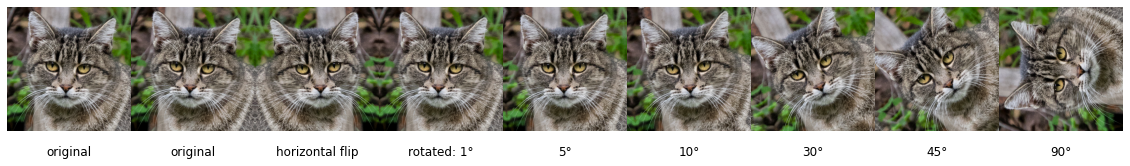

In [19]:
# show the rotated images
fig, axes = plt.subplots(1, 9, figsize=(20, 5))

CAT_IMG = 'flickr_cat_000368'

# Display the first image in the first subplot
img_cat = imread(cat_path / f'{CAT_IMG}.png')
axes[0].imshow(img_cat)
axes[0].axis('off')
axes[0].text(0.5,-0.2, "original", size=12, ha="center", transform=axes[0].transAxes)

# Display the first image in the first subplot
img_cat_org_again = imread(cat_path / f'{CAT_IMG}rotated0.png')
axes[1].imshow(img_cat_org_again)
axes[1].axis('off')
axes[1].text(0.5,-0.2, "original", size=12, ha="center", transform=axes[1].transAxes)

# Display the first image in the first subplot
img_cat_flipped = imread(cat_path / f'{CAT_IMG}rotated0flipped.png')
axes[2].imshow(img_cat_flipped)
axes[2].axis('off')
axes[2].text(0.5,-0.2, "horizontal flip", size=12, ha="center", transform=axes[2].transAxes)

# Display the second image in the second subplot
img_cat_1 = imread(cat_path / f'{CAT_IMG}rotated1.png')
axes[3].imshow(img_cat_1)
axes[3].axis('off')
axes[3].text(0.5,-0.2, "rotated: 1°", size=12, ha="center", transform=axes[3].transAxes)

# Display the second image in the second subplot
img_cat_5 = imread(cat_path / f'{CAT_IMG}rotated5.png')
axes[4].imshow(img_cat_5)
axes[4].axis('off')
axes[4].text(0.5,-0.2, "5°", size=12, ha="center", transform=axes[4].transAxes)

# Display the second image in the second subplot
img_cat_10 = imread(cat_path / f'{CAT_IMG}rotated10.png')
axes[5].imshow(img_cat_10)
axes[5].axis('off')
axes[5].text(0.5,-0.2, "10°", size=12, ha="center", transform=axes[5].transAxes)

# Display the second image in the second subplot
img_cat_30 = imread(cat_path / f'{CAT_IMG}rotated30.png')
axes[6].imshow(img_cat_30)
axes[6].axis('off')
axes[6].text(0.5,-0.2, "30°", size=12, ha="center", transform=axes[6].transAxes)

# Display the second image in the second subplot
img_cat_45 = imread(cat_path / f'{CAT_IMG}rotated45.png')
axes[7].imshow(img_cat_45)
axes[7].axis('off')
axes[7].text(0.5,-0.2, "45°", size=12, ha="center", transform=axes[7].transAxes)

# Display the second image in the second subplot
img_cat_90 = imread(cat_path / f'{CAT_IMG}rotated90.png')
axes[8].imshow(img_cat_90)
axes[8].axis('off')
axes[8].text(0.5,-0.2, "90°", size=12, ha="center", transform=axes[8].transAxes)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0, hspace=10)

# Show the figure
plt.show()


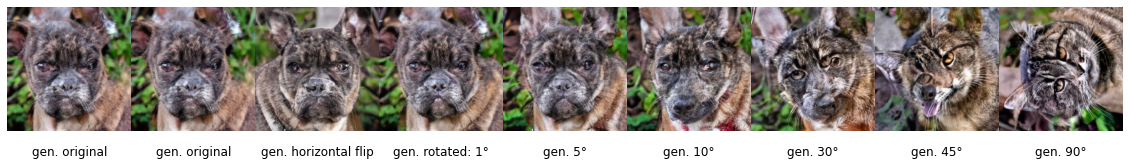

In [20]:
# show the Outputs of the model
fig, axes = plt.subplots(1, 9, figsize=(20, 5))

DOG_GEN_PATH = BASE_DIR / 'output/experiment_1_2_42_cat42-57'
DOG_IMG = 'flickr_gen_dog_000368'
# Display the first image in the first subplot
img_dog = imread(DOG_GEN_PATH / f'{DOG_IMG}.png')
axes[0].imshow(img_dog)
axes[0].axis('off')
axes[0].text(0.5,-0.2, "gen. original", size=12, ha="center", transform=axes[0].transAxes)

# Display the first image in the first subplot
img_dog_org_again = imread(DOG_GEN_PATH / f'{DOG_IMG}rotated0.png')
axes[1].imshow(img_dog_org_again)
axes[1].axis('off')
axes[1].text(0.5,-0.2, "gen. original", size=12, ha="center", transform=axes[1].transAxes)

# Display the first image in the first subplot
img_dog_flipped = imread(DOG_GEN_PATH / f'{DOG_IMG}rotated0flipped.png')
axes[2].imshow(img_dog_flipped)
axes[2].axis('off')
axes[2].text(0.5,-0.2, "gen. horizontal flip", size=12, ha="center", transform=axes[2].transAxes)

# Display the second image in the second subplot
img_dog_1 = imread(DOG_GEN_PATH / f'{DOG_IMG}rotated1.png')
axes[3].imshow(img_dog_1)
axes[3].axis('off')
axes[3].text(0.5,-0.2, "gen. rotated: 1°", size=12, ha="center", transform=axes[3].transAxes)

# Display the second image in the second subplot
img_dog_5 = imread(DOG_GEN_PATH / f'{DOG_IMG}rotated5.png')
axes[4].imshow(img_dog_5)
axes[4].axis('off')
axes[4].text(0.5,-0.2, "gen. 5°", size=12, ha="center", transform=axes[4].transAxes)

# Display the second image in the second subplot
img_dog_10 = imread(DOG_GEN_PATH / f'{DOG_IMG}rotated10.png')
axes[5].imshow(img_dog_10)
axes[5].axis('off')
axes[5].text(0.5,-0.2, "gen. 10°", size=12, ha="center", transform=axes[5].transAxes)

# Display the second image in the second subplot
img_dog_30 = imread(DOG_GEN_PATH / f'{DOG_IMG}rotated30.png')
axes[6].imshow(img_dog_30)
axes[6].axis('off')
axes[6].text(0.5,-0.2, "gen. 30°", size=12, ha="center", transform=axes[6].transAxes)

# Display the second image in the second subplot
img_dog_45 = imread(DOG_GEN_PATH / f'{DOG_IMG}rotated45.png')
axes[7].imshow(img_dog_45)
axes[7].axis('off')
axes[7].text(0.5,-0.2, "gen. 45°", size=12, ha="center", transform=axes[7].transAxes)

# Display the second image in the second subplot
img_dog_90 = imread(DOG_GEN_PATH / f'{DOG_IMG}rotated90.png')
axes[8].imshow(img_dog_90)
axes[8].axis('off')
axes[8].text(0.5,-0.2, "gen. 90°", size=12, ha="center", transform=axes[8].transAxes)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0, hspace=10)

# Show the figure
plt.show()

### Run cycle diffusion (DDPM)
- We provide here an example of how to run cycle diffusion using the terminal.

In [4]:
# run from the terminal:
# !export CUDA_VISIBLE_DEVICES=0
# !export RUN_NAME=experiment_test2
# !export SEED=42
# !export LOCAL_RANK=0

# !python -m torch.distributed.launch --nproc_per_node 1 --master_port 1446 main.py --seed $SEED --cfg experiments/$RUN_NAME.cfg --run_name $RUN_NAME$SEED --logging_strategy steps --logging_first_step true --logging_steps 4 --evaluation_strategy steps --eval_steps 50 --metric_for_best_model CLIPEnergy --greater_is_better false --save_strategy steps --save_steps 50 --save_total_limit 1 --load_best_model_at_end --gradient_accumulation_steps 4 --num_train_epochs 0 --adafactor false --learning_rate 1e-3 --do_eval --output_dir output/$RUN_NAME$SEED --overwrite_output_dir --per_device_train_batch_size 1 --per_device_eval_batch_size 1 --eval_accumulation_steps 4 --ddp_find_unused_parameters true --verbose true --custom_z_name rotated_images --disable_wandb True --save_time_steps True


### Calculate similarity metrics
- calculate the similarity metrics between the original cat image and the perturbed images of the same cat.
- Metrics used are cosine similarity and Euclidean distance.
- Similarity calculation requires a lot of compute, so we recommend not to run this step in the notebook directly. 
- Instead, we provide a script with the necceassry code to run the similarity calculation (command line instructions can be found in the follwing cell).

In [5]:
# Command line instructions to run similarity calculations
# !export OUTPUT="/home/lcur1732/cycle-diffusion-group12/src/cycle-diffusion/sim_outputs/"
# !export INPUT="/home/lcur1732/cycle-diffusion-group12/src/cycle-diffusion/output/experiment_1_2_42_cat42-57/"

# !python calculate_z_sims.py --input $INPUT --output $OUTPUT


In [6]:
# Example of how to calculate the similarity
# Load a vector z
# z_path_original = BASE_DIR / 'output/experiment_1_2_42_cat42-57/z_flickr_cat_000522.png.npy'
# z_path_rotated_30 = BASE_DIR / 'output/experiment_1_2_42_cat42-57/z_flickr_cat_000522rotated30.png.npy'

# z_vectors = np.zeros((2, 167116800), dtype=np.float32)
# z_vectors[0] = np.load(z_path_original)
# z_vectors[1] = np.load(z_path_rotated_30)

# # Calculate the cosine similarity
# cosine_sim = [np.dot(z_vectors[0],row)/(norm(z_vectors[0])*norm(row)) for row in z_vectors]
# print(cosine_sim)

# # Calculate the euclidean distance
# euc_dist = [np.linalg.norm(z_vectors[0] - row) for row in z_vectors]
# print(euc_dist)

## Read stored similarities
- Read the stored similarities from the previous step and visualize them.
- The structure of the stored similarities is as follows:
    - dict. with the name of the picture as primary key. 
        - dict. with keys 'cos_sim' and 'euc_dist' containing the pairwise similarity scores, and key 'mod_order_ref' containing the order of the modifications, this order is always equal for each cat image, but for the sake of completeness we store it.


In [7]:
# read pickle file with metrics and combine the outputs for all experiments
SIM_OUTPUT_PATH = BASE_DIR / 'sim_outputs'
all_metrics = {}
for sim_output in Path.iterdir(SIM_OUTPUT_PATH):
    with open (sim_output, 'rb') as fp:
        print(sim_output)
        metrics = pickle.load(fp)
        all_metrics.update(metrics)
    

order_long = ['original', 'rotated0', 'rotated0flipped', 'rotated1', 'rotated10', 'rotated30', 'rotated45', 'rotated5', 'rotated90'] # use for captions
order_short = ['org', '0','flipped', '1', '10', '30', '45', '5', '90'] # use for captions
[i.name for i in all_metrics['z_flickr_cat_000180']['mod_order_ref']]  # order of the similarity scores

../src/cycle-diffusion/sim_outputs/experiment_1_2_42_cat42-57_sim_data.pkl
../src/cycle-diffusion/sim_outputs/experiment_1_2_42_first_10_cats_sim_data.pkl
../src/cycle-diffusion/sim_outputs/experiment_1_2_42_cat11-26_sim_data.pkl
../src/cycle-diffusion/sim_outputs/experiment_1_2_42_cat27-42_sim_data.pkl


['z_flickr_cat_000180.png.npy',
 'z_flickr_cat_000180rotated0.png.npy',
 'z_flickr_cat_000180rotated0flipped.png.npy',
 'z_flickr_cat_000180rotated1.png.npy',
 'z_flickr_cat_000180rotated10.png.npy',
 'z_flickr_cat_000180rotated30.png.npy',
 'z_flickr_cat_000180rotated45.png.npy',
 'z_flickr_cat_000180rotated5.png.npy',
 'z_flickr_cat_000180rotated90.png.npy']

In [8]:
# save similarity scores for each image and its perturbated versions to df
import pandas as pd

imgs = all_metrics.keys()
cos_sims, euc_dists = [], []
for key in all_metrics.keys():
    cos_sims.extend(all_metrics[key]['cos_sim'])
    euc_dists.extend(all_metrics[key]['euc_dist'])

# generate labels
original_imgs = [[img] * 9 for img in imgs]
original_imgs = [item for sublist in original_imgs for item in sublist]

img_variations = order_long * len(imgs)

print(len(cos_sims), len(euc_dists), len(img_variations), len(original_imgs), len(imgs))
df_dict = {'original': original_imgs, 'variation': img_variations, 'cos_sim': cos_sims, 'euc_dist': euc_dists} 

495 495 495 495 55


In [9]:
# show df comparing original image to its perturbated versions
sim_df = pd.DataFrame(df_dict) 
sim_df.head(20) 

,original,variation,cos_sim,euc_dist
0,z_flickr_cat_000372,original,1.000000,0.000000
1,z_flickr_cat_000372,rotated0,1.000000,0.000000
2,z_flickr_cat_000372,rotated0flipped,0.981975,2500.463867
3,z_flickr_cat_000372,rotated1,0.985494,2242.264893
4,z_flickr_cat_000372,rotated10,0.982910,2434.825439
5,z_flickr_cat_000372,rotated30,0.982909,2434.630859
6,z_flickr_cat_000372,rotated45,0.982955,2431.451416
7,z_flickr_cat_000372,rotated5,0.983133,2418.505859
8,z_flickr_cat_000372,rotated90,0.982583,2458.168457
9,z_flickr_cat_000529,original,1.000000,0.000000


No handles with labels found to put in legend.


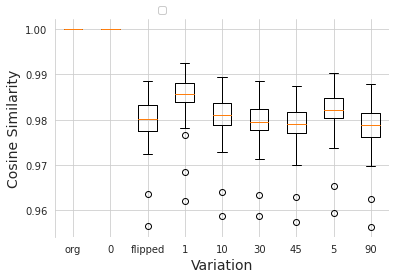

In [15]:
# create plot for cos similarity
vals = []
for variation in order_long:
    vals.append(sim_df[sim_df['variation'] == variation]['cos_sim'].values)


plt.boxplot(vals, labels=order_short)

sns.set_style("whitegrid")  # "white","dark","darkgrid","ticks"
boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
# flierprops = dict(marker='o', markersize=1,
#                   linestyle='none')
# whiskerprops = dict(color='#00145A')
# capprops = dict(color='#00145A')
# medianprops = dict(linewidth=1.5, linestyle='-', color='#01FBEE')

plt.xlabel("Variation", fontweight='normal', fontsize=14)
plt.ylabel("Cosine Similarity", fontweight='normal', fontsize=14)
sns.despine(bottom=True)

plt.legend(bbox_to_anchor=(0.31, 1.06), loc=2, borderaxespad=0., framealpha=1, facecolor ='white', frameon=True)

plt.show()

No handles with labels found to put in legend.


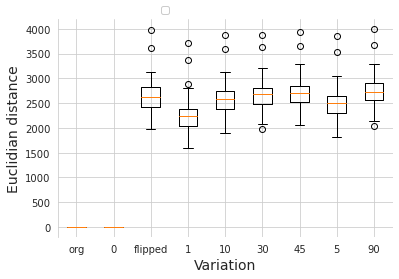

In [16]:
# create plot for euclidean distance
vals = []
for variation in order_long:
    vals.append(sim_df[sim_df['variation'] == variation]['euc_dist'].values)


plt.boxplot(vals, labels=order_short)

sns.set_style("whitegrid")  # "white","dark","darkgrid","ticks"
boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
# flierprops = dict(marker='o', markersize=1,
#                   linestyle='none')
# whiskerprops = dict(color='#00145A')
# capprops = dict(color='#00145A')
# medianprops = dict(linewidth=1.5, linestyle='-', color='#01FBEE')

plt.xlabel("Variation", fontweight='normal', fontsize=14)
plt.ylabel("Euclidian distance", fontweight='normal', fontsize=14)
sns.despine(bottom=True)

plt.legend(bbox_to_anchor=(0.31, 1.06), loc=2, borderaxespad=0., framealpha=1, facecolor ='white', frameon=True)

plt.show()

In [12]:
# get mean similarity score per variation
means = sim_df.groupby('variation').mean()
means

,cos_sim,euc_dist
variation,,
original,1.000000,0.000000
rotated0,1.000000,0.000000
rotated0flipped,0.979841,2643.239990
rotated1,0.985199,2255.402832
rotated10,0.980630,2592.262207
rotated30,0.979375,2676.824951
rotated45,0.978728,2719.694824
rotated5,0.981851,2506.610596
rotated90,0.978464,2735.980713


In [13]:
# get std of similarity score per variation
standard_deviations = sim_df.groupby('variation').std()
standard_deviations

,cos_sim,euc_dist
variation,,
original,8.403787e-08,0.000000
rotated0,8.403787e-08,0.000000
rotated0flipped,5.469230e-03,354.997901
rotated1,5.161229e-03,371.830091
rotated10,5.272746e-03,347.944196
rotated30,5.188180e-03,337.382562
rotated45,5.287351e-03,338.413821
rotated5,5.257743e-03,354.556911
rotated90,5.423888e-03,345.810448


## other rotation approaches (not used)

In [14]:
def crop_image(imgs, angle):
    for image in imgs:
        img = image
        # Rotate the image without cropping and adding black borders
        rotated_image = image.rotate(angle, expand=True, fillcolor='white')
        rotated_image = Image.fromarray(ndimage.zoom(rotated_image, 1.5))
        # Create a blank image with the original dimensions and white background
        output_image = Image.new("RGB", image.size, (255, 255, 255))


        # Paste the rotated image onto the center of the blank image
        x_offset = (output_image.width - rotated_image.width) // 2
        y_offset = (output_image.height - rotated_image.height) // 2
        output_image.paste(rotated_image, (x_offset, y_offset))


        path, name  = Path(img.filename).parents[0], Path(img.filename).stem
        new_name = f'{name}cropped{str(angle)}.png'
        output_image.save(path / new_name)
               
def rotate_image(imgs, angle):
    for img in imgs:
        path, name  = Path(img.filename).parents[0], Path(img.filename).stem
        new_name = f'{name}rotated{str(angle)}.png'
        
        img2 = img.rotate(angle)
        img2.save(path / new_name)
        
        
'''rotated = imread('demos/rotated.jpg')
cropped = imread('demos/cropped.jpg')
interpolated = imread('demos/interpolation.jpg')

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 10))
ax1.imshow(rotated)
ax2.imshow(cropped)
ax3.imshow(interpolated)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('rotation_method.png')
plt.show()'''

"rotated = imread('demos/rotated.jpg')\ncropped = imread('demos/cropped.jpg')\ninterpolated = imread('demos/interpolation.jpg')\n\nfig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 10))\nax1.imshow(rotated)\nax2.imshow(cropped)\nax3.imshow(interpolated)\n\nax1.axis('off')\nax2.axis('off')\nax3.axis('off')\nplt.subplots_adjust(wspace=0, hspace=0)\n\nplt.savefig('rotation_method.png')\nplt.show()"